In [74]:
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [75]:
class LogisticTorch:
    def __init__(self, lr=0.01, epochs=1000,epsilon = 1e-6):
        self.lr = lr
        self.epochs = epochs
        self.epsilon = epsilon
        self.theta = None
        self.loss_history = list()
        

    def fit(self, X, y):
        X = torch.tensor(X,dtype = torch.float32)
        y = torch.tensor(y,dtype = torch.float32).view(-1,1)
        ones = torch.ones((X.shape[0],1))
        X = torch.cat((ones,X), dim = 1)
        self.theta = torch.zeros((X.shape[1],1), dtype = torch.float32)

        for epoch in range(self.epochs):
            logits = X @ self.theta
            y_hat = torch.sigmoid(logits)
            grad = X.T @(y_hat - y)/len(y)
            oldtheta = self.theta.clone()
            loss = F.binary_cross_entropy_with_logits(logits.view(-1),y.view(-1))
            self.loss_history.append(loss.item())
            self.theta = self.theta - self.lr*grad

            if torch.norm(self.theta - oldtheta) < self.epsilon:
                print(f"Converged at epoch {epoch}")
                print(f"Final Loss in Model {loss.item():.5f}")
                break
        self.loss_history = torch.tensor(self.loss_history,dtype=torch.float32)

        

    def predict(self, X):
        X = torch.tensor(X, dtype = torch.float32)
        ones = torch.ones((X.shape[0],1),dtype = torch.float32)
        X = torch.cat((ones,X), dim =1 )
        logits = X @ self.theta
        return (logits>=0).float()

    def predict_proba(self, X):
        X = torch.tensor(X, dtype = torch.float32)
        ones = torch.ones((X.shape[0],1),dtype = torch.float32)
        X = torch.cat((ones,X), dim =1 )
        logits = X @ self.theta
        return torch.sigmoid(logits)


# Moons Dataset from sklearn

In [76]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.2, random_state=42)


In [77]:
split_ratio = 0.8

train_size = int(len(X)*split_ratio)
X_train = X[:train_size]
X_test = X[train_size:]

X_train = torch.tensor(X[:train_size], dtype = torch.float32)
y_train = torch.tensor(y[:train_size], dtype = torch.float32).view(-1,1)

X_test = torch.tensor(X[train_size:], dtype = torch.float32)
y_test= torch.tensor(y[train_size:], dtype = torch.float32).view(-1,1)

pd.DataFrame(X_train).head()

,0,1
0,-1.106897,0.042293
1,0.956800,0.456750
2,0.733516,0.584617
3,1.111407,-0.309214
4,0.209082,0.000657


# Training our model

In [78]:
my_model = LogisticTorch()
my_model.fit(X_train,y_train)
y_hat_train = my_model.predict(X_train)
y_hat_train_probs = my_model.predict_proba(X_train)
losses_mymodel = my_model.loss_history


C:\Users\krish.HP.000\AppData\Local\Temp\ipykernel_23240\3877790524.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X,dtype = torch.float32)
C:\Users\krish.HP.000\AppData\Local\Temp\ipykernel_23240\3877790524.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y,dtype = torch.float32).view(-1,1)
C:\Users\krish.HP.000\AppData\Local\Temp\ipykernel_23240\3877790524.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype = torch.float32)
C:\Users\krish.HP.000\AppData\Local\Temp\ip

In [79]:
y_train = torch.tensor(y_train).view(-1,1)
train_accuracy = (y_hat_train == y_train).float().mean()
print(f"training accuracy: {train_accuracy:.4f}")


training accuracy: 0.8188


C:\Users\krish.HP.000\AppData\Local\Temp\ipykernel_23240\3009579274.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train).view(-1,1)


In [80]:
y_hat_test = my_model.predict(X_test)
test_accuracy = (y_hat_test == torch.tensor(y_test).view(-1,1)).float().mean()
print(f"test accuracy: {test_accuracy:.4f}")

print(y_hat_test.shape)
print(y_test.shape)


test accuracy: 0.8500
torch.Size([40, 1])
torch.Size([40, 1])


C:\Users\krish.HP.000\AppData\Local\Temp\ipykernel_23240\3877790524.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype = torch.float32)
C:\Users\krish.HP.000\AppData\Local\Temp\ipykernel_23240\1844160572.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_accuracy = (y_hat_test == torch.tensor(y_test).view(-1,1)).float().mean()


In [81]:
true_positive = ((y_hat_test == 1) & (y_test == 1)).float().sum()
false_positive = ((y_hat_test == 1) & (y_test == 0)).float().sum()
true_negative = ((y_hat_test == 0) & (y_test == 0)).float().sum()
false_negative = ((y_hat_test == 0) & (y_test == 1) ).float().sum()

recall = true_positive/(true_positive+false_negative)
precision = true_positive/(true_positive+false_positive)

print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")

Recall: 0.818
Precision: 0.900


# Training sklearn Model

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,log_loss
import torch.nn.functional as F


In [83]:
model_sklearn = LogisticRegression(solver='lbfgs', max_iter=1, warm_start=True)
epochs = 1000
losses = []
y_train = y_train.view(-1) # y_train is made into 1D (samples,) from (samples,1)



In [84]:
for epoch in range(epochs):
    model_sklearn.fit(X_train,y_train)
    logits = model_sklearn.decision_function(X_train)
    logits_tensor = torch.tensor(logits,dtype=torch.float32)
    loss = F.binary_cross_entropy_with_logits(logits_tensor,y_train)
    losses.append(loss.item())
    print(f"epoch {epoch+1}: loss={loss.item()}")


c:\Users\krish.HP.000\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\krish.HP.000\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

epoch 1: loss=0.4875923991203308
epoch 2: loss=0.39269763231277466
epoch 3: loss=0.35998794436454773
epoch 4: loss=0.34378281235694885
epoch 5: loss=0.33192986249923706
epoch 6: loss=0.32616063952445984
epoch 7: loss=0.3253004848957062
epoch 8: loss=0.32547497749328613
epoch 9: loss=0.3263463079929352
epoch 10: loss=0.32641828060150146
epoch 11: loss=0.32699650526046753
epoch 12: loss=0.32700106501579285
epoch 13: loss=0.32700106501579285
epoch 14: loss=0.32700106501579285
epoch 15: loss=0.32700106501579285
epoch 16: loss=0.32700106501579285
epoch 17: loss=0.32700106501579285
epoch 18: loss=0.32700106501579285
epoch 19: loss=0.32700106501579285
epoch 20: loss=0.32700106501579285
epoch 21: loss=0.32700106501579285
epoch 22: loss=0.32700106501579285
epoch 23: loss=0.32700106501579285
epoch 24: loss=0.32700106501579285
epoch 25: loss=0.32700106501579285
epoch 26: loss=0.32700106501579285
epoch 27: loss=0.32700106501579285
epoch 28: loss=0.32700106501579285
epoch 29: loss=0.327001065015792

In [85]:
y_pred = model_sklearn.predict(X_test)
y_pred_probs = model_sklearn.predict_proba(X_test)[:, 1]


In [86]:
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8250
Precision: 0.8947
Recall: 0.7727
F1 Score: 0.8293


# Plotting Loss Curves

### sklearn Model

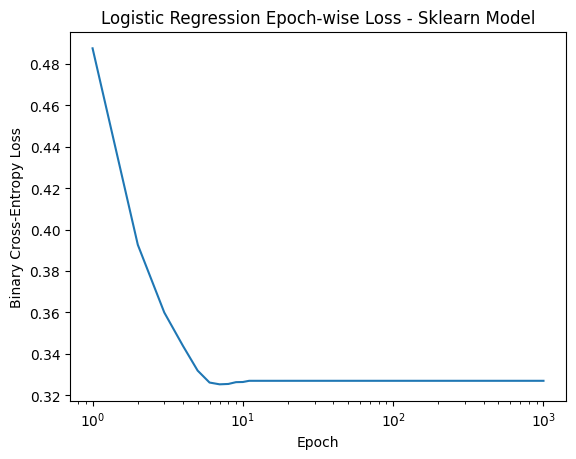

In [87]:
plt.plot(range(1, epochs+1), losses)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Logistic Regression Epoch-wise Loss - Sklearn Model")
plt.xscale("log")
plt.show()

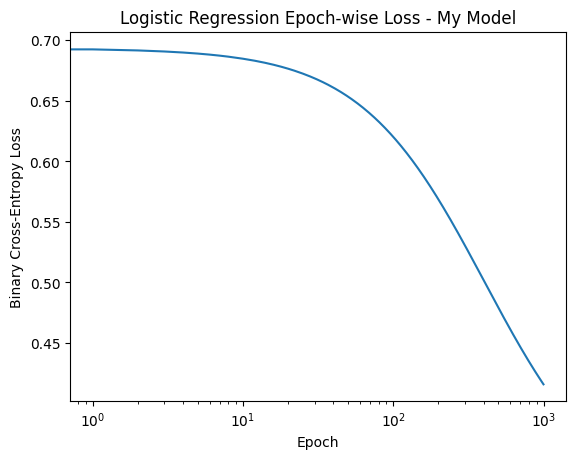

In [88]:
plt.plot(range(len(losses_mymodel)), losses_mymodel)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Logistic Regression Epoch-wise Loss - My Model")
plt.xscale("log")
plt.show()


# Plotting Decision Boundary

### Sklearn Model

C:\Users\krish.HP.000\AppData\Local\Temp\ipykernel_23240\3877790524.py:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype = torch.float32)


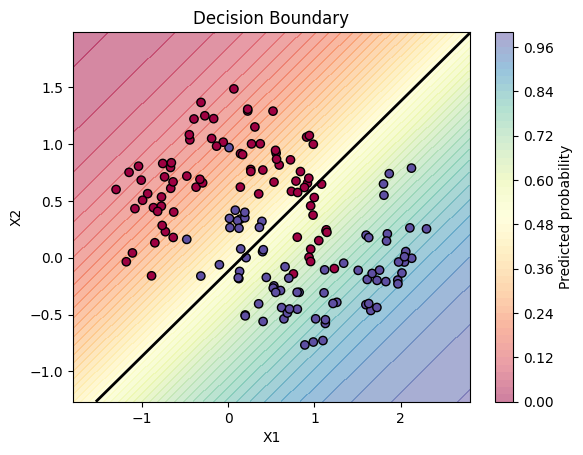

In [98]:
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

XX, YY = torch.meshgrid(
    torch.linspace(x_min, x_max, 200),
    torch.linspace(y_min, y_max, 200)
)

grid_points = torch.cat([XX.unsqueeze(-1), YY.unsqueeze(-1)], dim=-1).reshape(-1, 2)

probs = my_model.predict_proba(grid_points).reshape(XX.shape)

contour = plt.contourf(XX, YY, probs.detach().numpy(), levels=50, cmap=plt.cm.Spectral, alpha=0.5)
plt.contour(XX, YY, probs.detach().numpy(), levels=[0.5], colors='k', linewidths=2)
plt.colorbar(contour, label='Predicted probability')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.flatten(), cmap=plt.cm.Spectral, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()

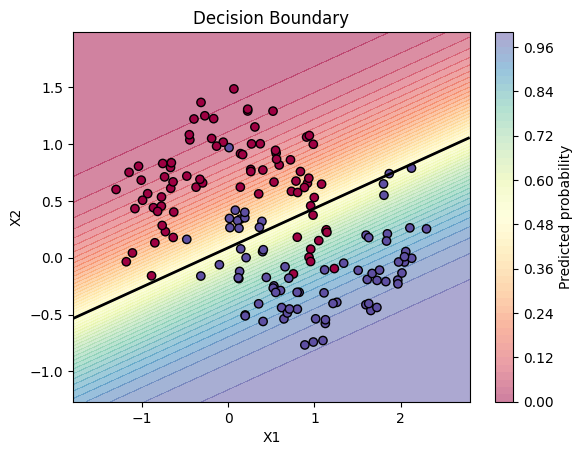

In [101]:
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

XX, YY = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

grid_points = np.c_[XX.ravel(), YY.ravel()]  # shape (num_points, 2)

probs = model_sklearn.predict_proba(grid_points)[:, 1].reshape(XX.shape)

contour = plt.contourf(XX, YY, probs, levels=50, cmap=plt.cm.Spectral, alpha=0.5)
plt.contour(XX, YY, probs, levels=[0.5], colors='k', linewidths=2)
plt.colorbar(contour, label='Predicted probability')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.flatten(), cmap=plt.cm.Spectral, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()
